<a href="https://colab.research.google.com/github/shyamjith94/OpencvImagemanipulation/blob/main/2_5_1_Spatial_Filtering_PIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png   

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

In [5]:
image_cameraman = "cameraman.jpeg"
image_lenna = "lenna.png"
image_barbara = "barbara.png"   

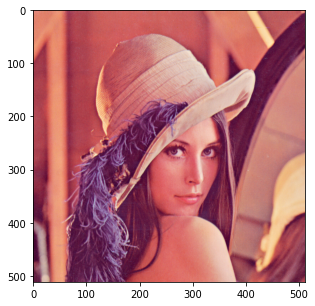

In [6]:
image = Image.open(image_lenna)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

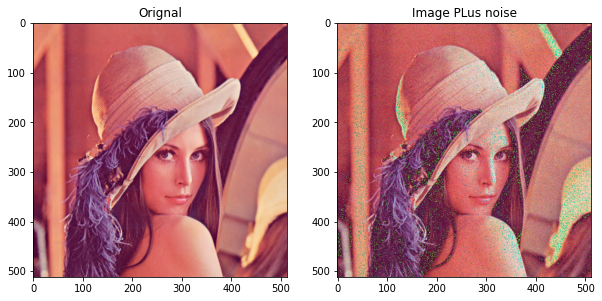

In [7]:
rows, cols = image.size
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0, 15, (rows, cols, 3)).astype(np.uint8)
noisy_image = image+noise
noisy_image = Image.fromarray(noisy_image)
plot_image(image, noisy_image, title_2="Image PLus noise")

##Filtering Noise

In [8]:
from PIL import ImageFilter

In [9]:
kernel = np.ones((5,5))/36
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

In [10]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

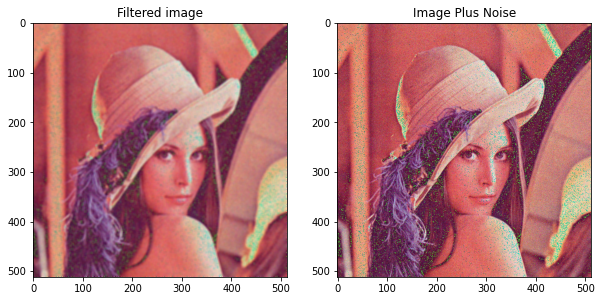

In [11]:
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

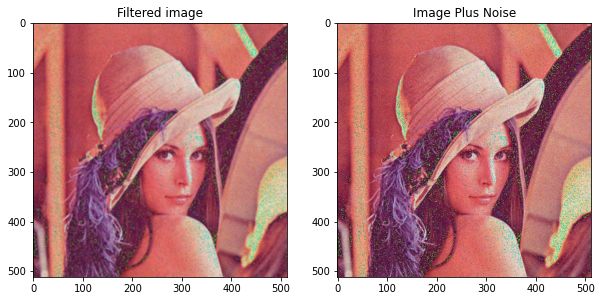

In [12]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel = np.ones((3,3))/36
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter)
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

##Gaussian Blur

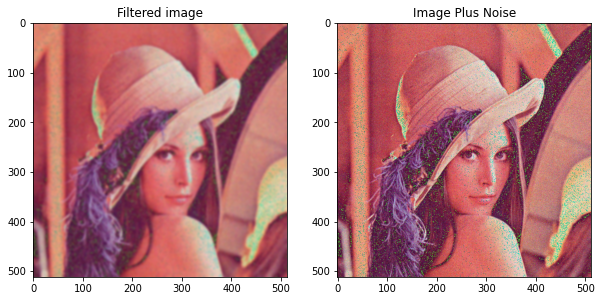

In [13]:
# Filters the images using GaussianBlur
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

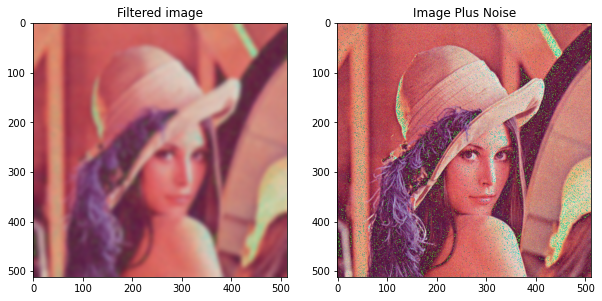

In [14]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

##Image Sharpening

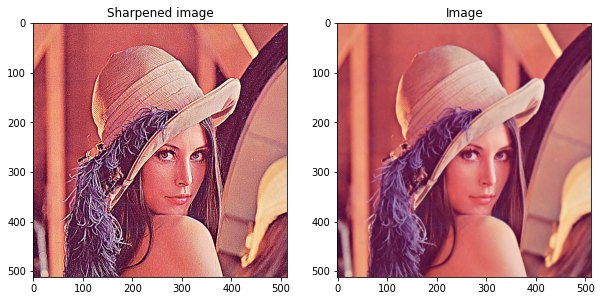

In [15]:
#Image Sharpening involves smoothing the image and calculating the derivatives. We can accomplish image sharpening by applying the following Kernel.

kernal = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1],
                   ])
kernal = ImageFilter.Kernel((3,3), kernal.flatten())
shaepened = image.filter(kernal)
plot_image(shaepened , image, title_1="Sharpened image",title_2="Image")

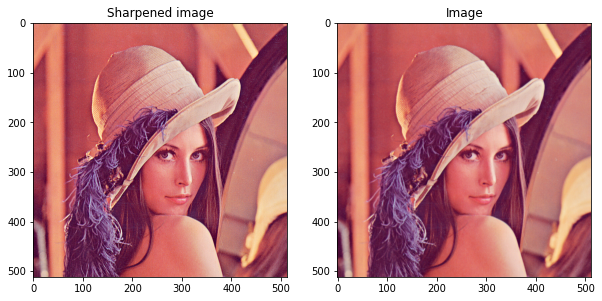

In [16]:
# Sharpends image using predefined image filter from PIL
sharpened = image.filter(ImageFilter.SHARPEN)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

##Edage

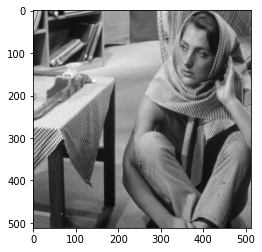

In [17]:
# Loads the image from the specified file
img_gray = Image.open(image_barbara)
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')
plt.show()

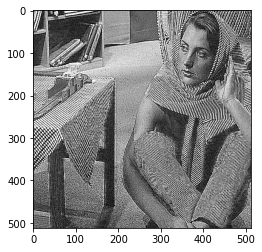

In [19]:
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(img_gray ,cmap='gray')
plt.show()

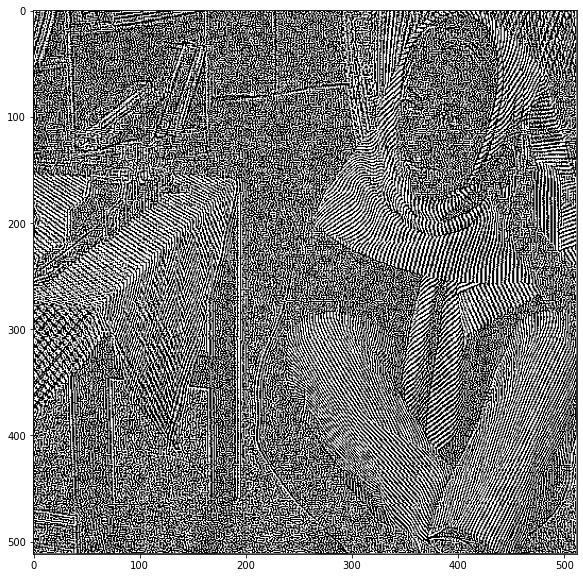

In [21]:
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
plt.figure(figsize=(10,10))
plt.imshow(img_gray ,cmap='gray')
plt.show()

## Median

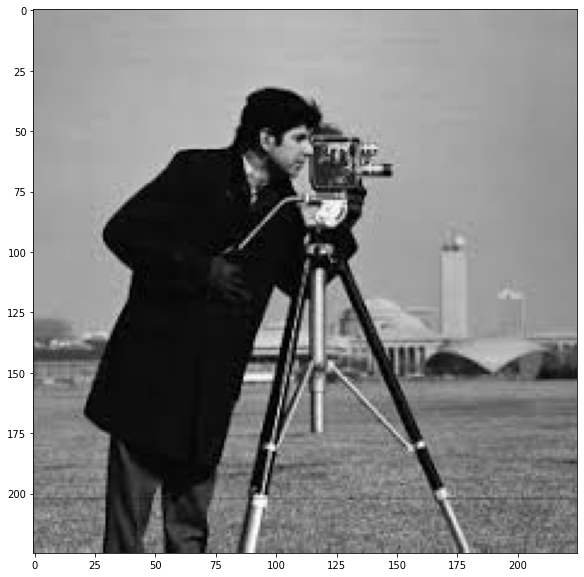

In [22]:
# Load the camera man image
image = Image.open(image_cameraman)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")
plt.show()

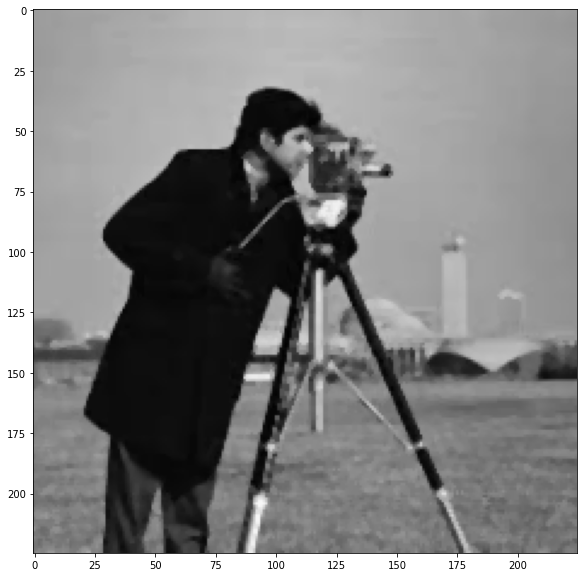

In [23]:
#Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")
plt.show()